In [1]:
##Import library and read data
import pandas as pd
nbalog=pd.read_csv("https://raw.githubusercontent.com/sgerardak/databasketball/master/nba_logreg.csv")

In [2]:
###See data description
decri=nbalog.describe()
decri

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [3]:
###Using the data described we notice that 3P% has some blank fields. 
###These fields will be filled with 0.
nbalog=nbalog.fillna(0)

###We check the correlation that exists between the data.
pearson=nbalog.corr(method='pearson')
pearson


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.037133,0.482123,0.479487,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,0.396833
MIN,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.168070,0.791000,0.779609,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,0.317805
PTS,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.154955,0.896297,0.880703,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,0.315981
FGM,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.122542,0.848019,0.840408,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,0.317594
FGA,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.201186,0.826616,0.805559,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,0.292660
FG%,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.336502,0.245776,0.300154,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,0.227134
3P Made,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.591733,0.158472,0.095396,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,0.036619
3PA,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.584853,0.173533,0.108388,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,0.018110
3P%,0.037133,0.168070,0.154955,0.122542,0.201186,-0.336502,0.591733,0.584853,1.000000,0.036245,-0.027249,0.332458,-0.289399,-0.125716,-0.193082,0.266898,0.198237,-0.246358,0.111495,-0.000004
FTM,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.036245,1.000000,0.980505,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,0.296841


In [4]:
###Some variables are higly correlated so they will be dropped (pearson>.8).
nbalog=nbalog.drop(['MIN', 'PTS','FGM','3P Made','FTM','FTA','TOV','OREB','DREB'], axis=1)

### X are the variables that predict and y the variable we are trying to predict.
X=nbalog[['GP','FGA','FG%','3PA','3P%','FT%','REB','AST','STL','BLK']]
y=nbalog[['TARGET_5Yrs']]

In [5]:
### The data has to be divided in training and test set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


In [6]:
###We import the model that will be used.
from sklearn.linear_model import LogisticRegression

# Create an instance of the model.
logreg = LogisticRegression()

# Training the model.
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# Do prediction.
y_pred=logreg.predict(X_test)

In [8]:
# Analyzing the results
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 73,  56],
       [ 47, 159]])

In [9]:
# Libraries used for plots and arrays.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0.5, 257.44, 'Predicted label')

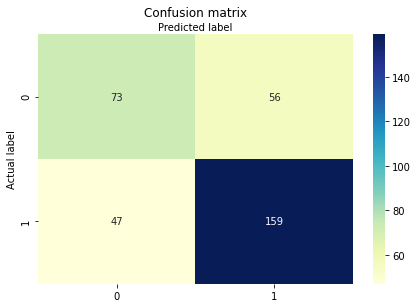

In [10]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6925373134328359
